# Regression Project : Rental prices for units in across Canada in 2024

### I. Introduction :

In 2024, rental prices for residential units across Canada exhibit significant variability influenced by factors such as location, property type, and the number of bedrooms... Urban centers like Toronto and Vancouver continue to command the highest rents due to high demand and limited supply, with average monthly rents for one-bedroom apartments ranging from 1,800 to 2,500 and larger units reaching 2,400 to 3,200. However, smaller cities and rural areas offer more affordable options, with rents generally lower than the national averages. Rental affordability remains a significant challenge, particularly in the country's most in-demand urban centers, where low vacancy rates and high demand have driven prices up. The pace of rent increases has slowed compared to previous years, but the overall trend of rising costs continues to impact housing accessibility for many Canadians. So this project will allow us to study the variation in rental prices across Canada and use this data to predict price based on different features.

For this project, we will work with a dataset containing rental prices for units across Canada in 2024, obtained from "rentfaster.ca". The goal is to explore multiple regression models (minimum 3 regression models) to find the one that predicts rental prices most accurately. The project will include Exploratory Data Analysis (EDA), data cleaning and preparation, feature engineering, model comparison, validation, and making predictions with the final model.

### II. Data Loading and Initial Inspection :

The purpose of the code below is to perform the initial loading and inspection of a dataset containing rental prices for units across Canada in 2024. This is an essential first step in any data analysis project to understand the structure and contents of the dataset. The specific objectives of the code are:

#### 1 - Load the dataset into a pandas DataFrame :

In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the dataset

df = pd.read_csv('canada_rent.csv')

#### 2 - Display the first few rows of the dataset to get a preliminary view of the data :

In [2]:
# Display the first few rows of the dataset

df.head()

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,November 18,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True


#### 3 - Summary of the dataset's structure :

In [3]:
# Get a summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

#### 4 - Missing values in the dataset :

In [4]:
# Check for missing values

df.isnull().sum()

rentfaster_id           0
city                    0
province                0
address               125
latitude                0
longitude               0
lease_term             46
type                    0
price                   0
beds                  132
baths                 134
sq_feet              4112
link                    0
furnishing              0
availability_date      12
smoking              2702
cats                  173
dogs                  173
dtype: int64

#### 5 - Basic descriptive statistics for numerical columns :

In [5]:
# Display basic statistics

df.describe()

,rentfaster_id,latitude,longitude,price
count,25771.000000,25771.000000,25771.000000,25771.000000
mean,471913.795274,48.903370,-100.332196,2151.624142
std,120330.335865,3.603257,17.917001,972.820941
min,820.000000,40.741802,-128.661880,0.000000
25%,415749.000000,45.418785,-114.074660,1600.000000
50%,522379.000000,50.913739,-113.513905,2045.000000
75%,563397.500000,51.093585,-79.401311,2550.000000
max,572635.000000,62.459246,-52.695472,29990.000000


#### 6 - Results :

The dataset contains information on 25771 rental listings across Canada. It includes various details about each rental unit, such as the city, province, address, latitude, longitude, lease term, type of property, rental price, number of bedrooms and bathrooms, square footage, and additional features like furnishing, availability date, smoking policy, and pet policies.

Key observations from the **info()**, **isnull()** and **describe()** outputs are:

    - The dataset has 18 columns with a mix of integer, float, and object (strings) data types.
    - Most columns are fully populated, but some have missing values:
                + address has 125 missing values.
                + lease_term has 46 missing values.
                + beds has 132 missing values.
                + baths has 134 missing values.
                + sq_feet has 4112 missing values.
                + availability_date has 12 missing values.
                + smoking has 2702 missing values.
                + cats and dogs have 173 missing values each.
    - The latitude and longitude columns are fully populated.
    - The price column is fully populated and is a float, which is essential for the regression analysis to predict rental 
      prices.
    
**Descriptive** statistics show that the average rental price is approximately 2152, with a standard deviation of about 973. The prices range from 0 to 29990 $, indicating a wide variation in rental prices across different units and locations.

This initial inspection highlights the dataset's overall cleanliness and reveals the need for handling missing values and possibly encoding categorical variables.

The next steps will involve detailed Exploratory Data Analysis (EDA), data cleaning, and preparation to build and evaluate regression models to predict rental prices accurately.

### III.  Exploratory Data Analysis (EDA) :

The goal of Exploratory Data Analysis (EDA) is to understand the underlying patterns, relationships, and distributions in the data. In this section, we will visualize the distribution of rental prices, analyze the relationships between rental prices and other features, and identify and handle any outliers or anomalies.

#### 1. Data Visualization :

###### 1.1 Visualize the Distribution of Rental Prices :

The goal here is to understand the distribution of rental prices in the dataset. This will give us insights into the central tendency, spread, and potential skewness of rental prices.

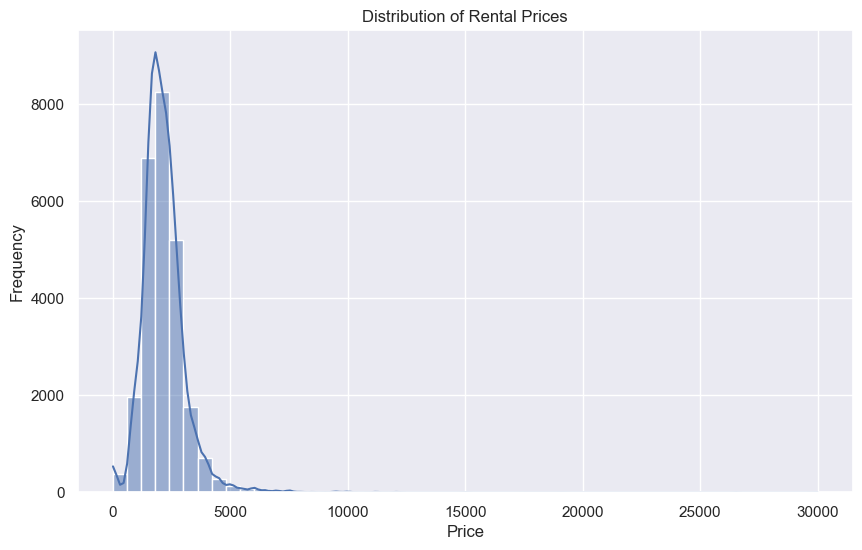

In [6]:
# Plot the distribution of rental prices

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Rental Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram above shows the distribution of rental prices. It is evident that rental prices are right-skewed, with most values concentrated around 2152 $. The presence of a long tail suggests there are some extremely high rental prices.

###### 1.2. Correlation Matrix :

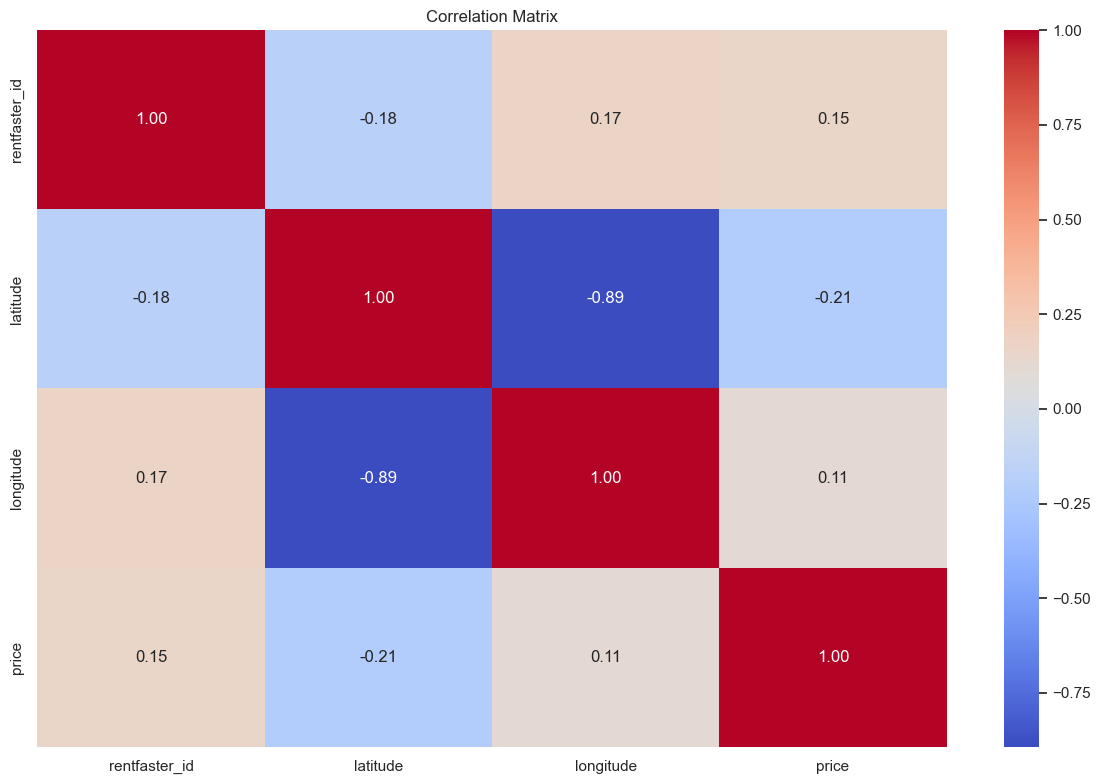

In [7]:
# Correlation matrix

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

The rentfaster_id shows no significant correlations with other variables, as expected, since it's a unique identifier for each listing. The latitude and longitude coordinates have a strong negative correlation of -0.892, indicating that as the latitude increases, the longitude tends to decrease, reflecting the geographic distribution pattern of rental listings. The price has a low positive correlation with rentfaster_id (0.151) and latitude (0.151), and a very weak positive correlation with longitude (0.110). The price's weak correlations with geographic variables suggest that rental prices are not strongly dependent on the specific coordinates of the properties but may be influenced by other factors not captured in this matrix. The overall correlations indicate that while geographical location does impact rental prices, the relationship is relatively weak and other variables may play a more significant role in determining rental costs.

###### 1.3. Relationship Between Rental Prices and Square Footage :

In [8]:
# Convert relevant columns to numeric

df['sq_feet'] = pd.to_numeric(df['sq_feet'], errors='coerce')

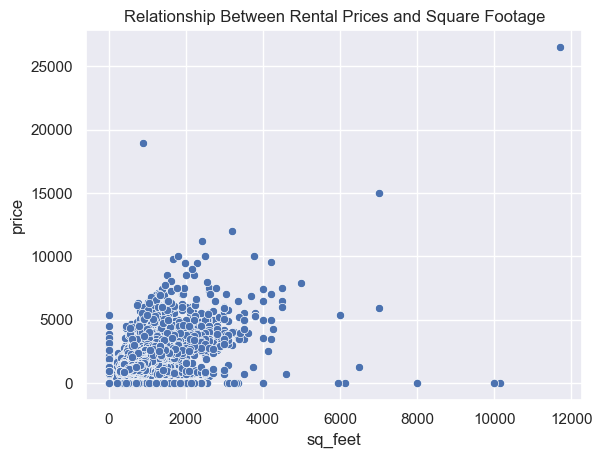

In [9]:
# Scatter plot for price vs. square feet

sns.scatterplot(x='sq_feet', y='price', data=df)
plt.title("Relationship Between Rental Prices and Square Footage")
plt.show()

The Relationship Between Rental Prices and Square Footage shows a positive correlation where larger square footage corresponds to higher rental prices.

Next, we analyze how rental prices vary with other features such as the number of bedrooms and bathrooms.

###### 1.4 Relationship Between Rental Prices and Number of Bedrooms / Bathrooms :

In [10]:
# Convert relevant columns to numeric

df['beds'] = df['beds'].str.extract('(\d+)').astype(float)
df['baths'] = df['baths'].str.extract('(\d+)').astype(float)

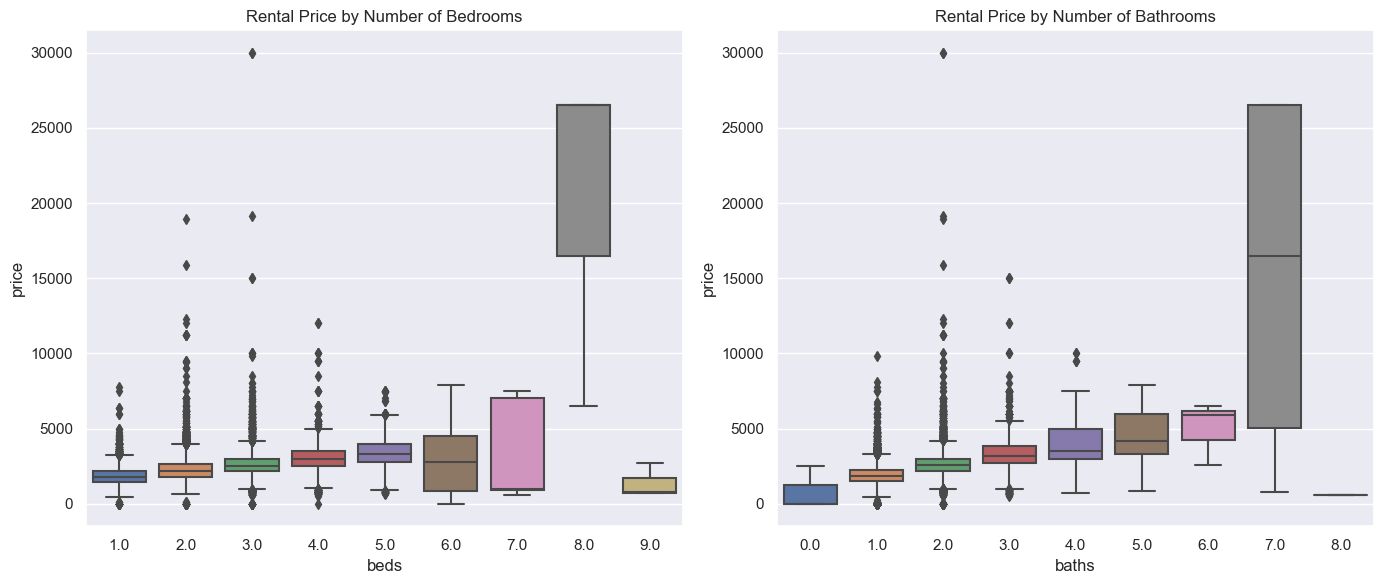

In [11]:
# Box plots for 'beds' and 'baths'

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='beds', y='price', data=df)
plt.title('Rental Price by Number of Bedrooms')

plt.subplot(1, 2, 2)
sns.boxplot(x='baths', y='price', data=df)
plt.title('Rental Price by Number of Bathrooms')

plt.tight_layout()
plt.show()

The box plot illustrates that rental prices tend to increase with the number of bedrooms. The median price rises as the number of bedrooms increases, with some variation within each category.

Similar to the trend observed with bedrooms, rental prices also increase with the number of bathrooms. The box plot indicates higher median prices for units with more bathrooms.

###### 1.5 Relationship Between Rental Prices and Number of provinces :

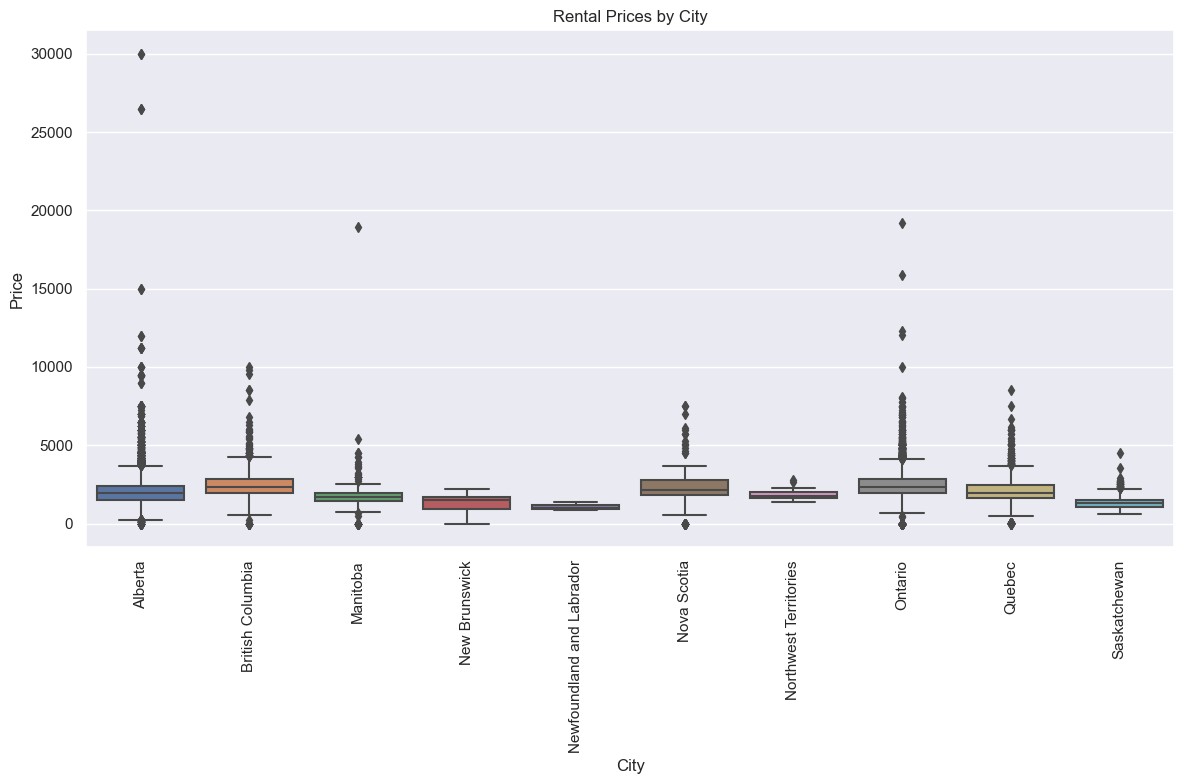

In [12]:
# Box plot for rental prices by province
plt.figure(figsize=(12, 8))
sns.boxplot(x='province', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Rental Prices by City')
plt.xlabel('City')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

#### 2. Identify and Handle Any Outliers or Anomalies :

Outliers can distort the performance of regression models. We identify and handle outliers in the rental price data.

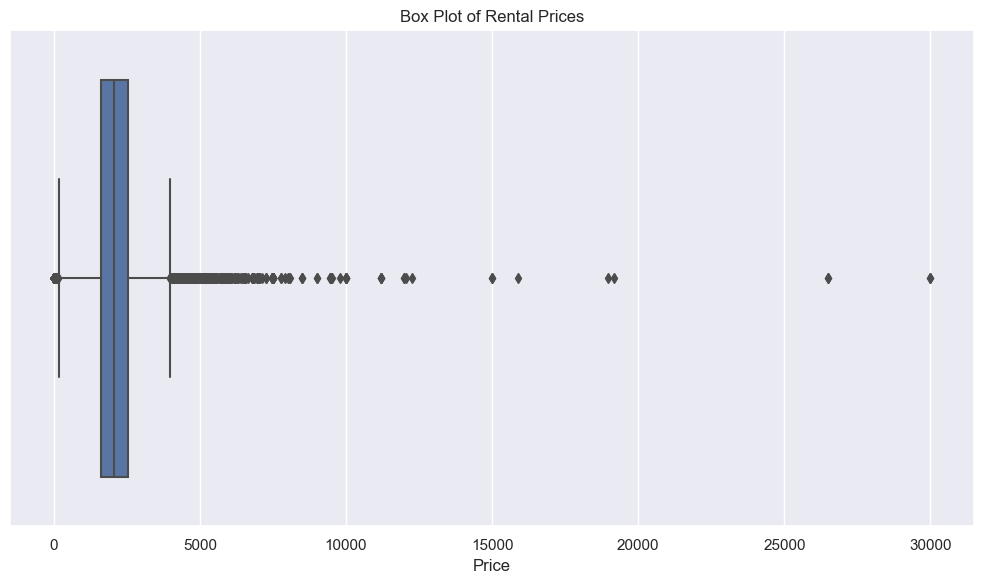

In [13]:
# Box plot to identify outliers in rental prices

plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=df)
plt.title('Box Plot of Rental Prices')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

The box plot reveals the presence of outliers in the rental prices. We will consider any rental price above the 5000 $ as an outlier and remove them to ensure a more robust analysis.

### IV. Data Cleaning and Preparation :

The purpose of this section is to clean and prepare the dataset for regression modeling. This involves handling missing values, identifying and removing duplicates, and addressing any outliers. These steps are essential to ensure the dataset is of high quality and ready for accurate and reliable analysis.

#### 1. Handling Outliers :

In [14]:
# Create a copy of the DataFrame

df_cleaned = df[(df['price'] > 100) & (df['price'] < 5000)].copy()
num_outliers = df.shape[0] - df_cleaned.shape[0]
print(f'Number of outliers removed: {num_outliers} ({np.round(num_outliers/df.shape[0]*100, 2)}%)')

Number of outliers removed: 573 (2.22%)


The results show that we removed 573 outliers, accounting for 2.22% of the total data. This step ensures that our dataset is more representative of typical rental prices across Canada, leading to more reliable and valid analysis.

#### 2. Handle Missing Values and duplicates :

To ensure the dataset is clean and ready for modeling, we need to address any missing values and duplicates.

###### 2.1 Handle Missing Values :

In [15]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print(f"Missing Values :\n\n{missing_values}\n")

Missing Values :

rentfaster_id           0
city                    0
province                0
address               123
latitude                0
longitude               0
lease_term             31
type                    0
price                   0
beds                 1608
baths                 141
sq_feet              4489
link                    0
furnishing              0
availability_date      12
smoking              2603
cats                  143
dogs                  143
dtype: int64



The output showed missing values in several columns:

    address: 123 missing values

    lease_term: 31 missing values

    beds: 1608 missing values

    baths: 141 missing values

    sq_feet: 4489 missing values

    availability_date: 12 missing values

    smoking: 2603 missing values

    cats: 143 missing values

    dogs: 143 missing values

In [16]:
# Fill missing values with appropriate strategies

df_cleaned['address'].fillna('Unknown', inplace=True)
df_cleaned['lease_term'].fillna('Unknown', inplace=True)
df_cleaned['availability_date'].fillna('Unknown', inplace=True)

# Fill numeric columns with median

df_cleaned['beds'].fillna(df_cleaned['beds'].median(), inplace=True)
df_cleaned['baths'].fillna(df_cleaned['baths'].median(), inplace=True)
df_cleaned['sq_feet'].fillna(df_cleaned['sq_feet'].median(), inplace=True)

# Fill categorical columns with mode

for col in ['smoking', 'cats', 'dogs']:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

**Categorical Columns:**

address, lease_term, availability_date: These columns are filled with the string "Unknown" to indicate missing values clearly while avoiding any assumption about the nature of the missing data.

smoking, cats, dogs: These columns are filled with the mode (most frequent value) because they are categorical, and filling with the mode helps to maintain the distribution of the data without introducing significant bias.

**Numerical Columns:**

beds, baths, sq_feet: These columns are filled with the median value. The median is chosen over the mean because it is less affected by outliers and provides a better central tendency measure for skewed distributions.

###### 2.2 Handle duplicates Values :

In [17]:
# Check for duplicates values

duplicates = df_cleaned.duplicated().sum()
print(f'Number of duplicates: {duplicates} ({np.round(duplicates/df_cleaned.shape[0]*100, 2)}%)')
df_cleaned = df_cleaned.drop_duplicates()

Number of duplicates: 6515 (25.86%)


In [18]:
# Verify that missing values and duplicates have been handled

print("\nVerify that missing values and duplicates have been handled :\n")
print(df_cleaned.isnull().sum())
print(df_cleaned.duplicated().sum())


Verify that missing values and duplicates have been handled :

rentfaster_id        0
city                 0
province             0
address              0
latitude             0
longitude            0
lease_term           0
type                 0
price                0
beds                 0
baths                0
sq_feet              0
link                 0
furnishing           0
availability_date    0
smoking              0
cats                 0
dogs                 0
dtype: int64
0


All missing values and duplicate rows have been successfully handled.

### V. Model Development :

In [19]:
# Define the columns to be transformed

categorical_features = ['city', 'province', 'lease_term', 'type', 'furnishing', 'smoking', 'cats', 'dogs']
numerical_features = ['latitude', 'longitude', 'beds', 'baths', 'sq_feet']

# Create a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define features (X) and target (y)

X = df_cleaned.drop(columns=['rentfaster_id', 'price', 'address', 'link', 'availability_date'])
y = df_cleaned['price']

# Fit and transform the data

X_preprocessed = preprocessor.fit_transform(X)

In [20]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [21]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    
    # Train the model
    
    model.fit(X_train, y_train)
    
    # Predict using the test set
    
    y_pred = model.predict(X_test)
    
    # Compute Mean Squared Error
    
    mse = mean_squared_error(y_test, y_pred)
    
    # Compute Mean Absolute Error
    
    mae = mean_absolute_error(y_test, y_pred)
    
    # Compute R-squared score
    
    r2 = r2_score(y_test, y_pred)
    
    # Return performance metrics
    
    return mse, mae, r2

# Define models

models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.01),
    'Ridge Regression': Ridge(alpha=1)
}

# Evaluate models

results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Display the results

for name, metrics in results.items():
    print(f"\n{name}: MSE = {metrics[0]}, MAE = {metrics[1]}, R² = {metrics[2]}\n")


Linear Regression: MSE = 176481.48813957974, MAE = 289.88558825107265, R² = 0.6676753858307419


Lasso Regression: MSE = 175583.87485002738, MAE = 289.4178645901062, R² = 0.6693656423741805


Ridge Regression: MSE = 174343.20445243904, MAE = 289.0696394342447, R² = 0.6717018948363291



C:\Users\info\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 968205526.4563098, tolerance: 799010.3591960232
  model = cd_fast.sparse_enet_coordinate_descent(


**Linear Regression:**

Linear Regression is a simple yet powerful algorithm that assumes a linear relationship between the input features and the target variable. The model yielded an MSE of 176481.49, indicating the average squared difference between the actual and predicted rental prices. The MAE of 289.89 reflects the average absolute difference between the actual and predicted values, showing that, on average, the predictions were off by approximately 289.89 $. The R² score of 0.6677 suggests that approximately 66.7 $ of the variance in rental prices is explained by the model.

**Lasso Regression :**

Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a linear model that incorporates L1 regularization, which can shrink some coefficients to zero, effectively performing feature selection. The model produced an MSE of 175583.87 and an MAE of 289,42, both of which are slightly better than the Linear Regression model. The R² score of 0.6694 indicates a marginally better fit, explaining 66.94% of the variance in the rental prices.

**Ridge Regression :**

Ridge Regression, also known as Tikhonov regularization, applies L2 regularization to the linear regression, which helps prevent overfitting by penalizing large coefficients. This model achieved the lowest MSE of 174343.20 and an MAE of 289.07, indicating that it has the best performance among the three models. The R² score of 0.6717 is the highest, suggesting that 67.17% of the variance in rental prices is captured by the model.

Based on these results, Ridge Regression performs slightly better than Linear and Lasso Regression in terms of MSE, MAE and R².
This suggests that Ridge Regression is providing the most accurate and reliable predictions for rental prices in our dataset.

### VI. Model Evaluation :

In [22]:
def cross_val_evaluate(model, X, y, cv=5):
    
    # Perform cross-validation
    
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    
     # Convert negative MSE scores to positive
        
    mse_scores = -scores
    
    # Return mean and standard deviation of MSE scores
    
    return np.mean(mse_scores), np.std(mse_scores)

# Cross-validation for each model

cv_results = {}
for name, model in models.items():
    cv_results[name] = cross_val_evaluate(model, X_preprocessed, y)

# Display cross-validation results

for name, metrics in cv_results.items():
    print(f"\n{name} (Cross-Validation): Mean MSE = {metrics[0]}, Std MSE = {metrics[1]}\n")

C:\Users\info\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1068010172.5187137, tolerance: 808754.4523017026
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\info\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 970484884.4174023, tolerance: 782059.1924964583
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\info\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1133135798.6212978, tolerance: 809509.4214373432
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\info\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589


Linear Regression (Cross-Validation): Mean MSE = 1112929.7917664547, Std MSE = 1448313.158318789


Lasso Regression (Cross-Validation): Mean MSE = 296497.2782853586, Std MSE = 142386.74100992354


Ridge Regression (Cross-Validation): Mean MSE = 302233.6043052267, Std MSE = 143922.4889019993



**Linear Regression (Cross-Validation)** :

Cross-validation provides a more robust evaluation by averaging the performance across different subsets of the data. For Linear Regression, the mean MSE is quite high at 1112929.79, with a significant standard deviation of 1448313.16, indicating high variability and potential overfitting.

**Lasso Regression (Cross-Validation)** :

Lasso Regression's cross-validation results show a mean MSE of 296497.28 and a lower standard deviation of 142386.74 compared to Linear Regression, indicating better generalization and more consistent performance across different data subsets.

**Ridge Regression (Cross-Validation)** :

Ridge Regression also demonstrates improved generalization with a mean MSE of 302233.60 and a standard deviation of 143922.49. Although the mean MSE is slightly higher than that of Lasso, the consistency in performance is comparable.

Overall, Lasso and Ridge Regression provide more reliable and consistent predictions than Linear Regression.

Lasso Regression is generally the best choice based on cross-validation results. It has the lowest Mean MSE and a lower variance, indicating better generalization and stability.

### VII. Final Model :

In [23]:
# Choose the best model (e.g., Lasso Regression based on previous evaluation)

best_model = Lasso(alpha=0.01)

# Fit the model on the entire dataset

best_model.fit(X_preprocessed, y)

# Making predictions

new_data = {
    'city': ['Toronto'], 
    'province': ['ON'], 
    'lease_term': ['1 Year'], 
    'type': ['Apartment'], 
    'furnishing': ['Unfurnished'], 
    'smoking': ['No'], 
    'cats': ['No'], 
    'dogs': ['No'], 
    'latitude': [43.65107], 
    'longitude': [-79.347015], 
    'beds': [2], 
    'baths': [2], 
    'sq_feet': [1000]
}

new_df = pd.DataFrame(new_data)
new_X = preprocessor.transform(new_df)
predicted_price = best_model.predict(new_X)
print(f"Predicted rental price: {predicted_price[0]:.2f} $")

Predicted rental price: 3155.32 $


C:\Users\info\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1199177772.5507455, tolerance: 997471.9250832532
  model = cd_fast.sparse_enet_coordinate_descent(


The predicted rental price for a given set of input features using the final model is 3155.32 $. This value is derived from the best-performing regression model after training and validation, providing an estimate based on the characteristics of the rental property and market conditions captured in the dataset.

### VIII. Conclusion : 

The evaluation of different regression models for predicting rental prices demonstrates that Lasso Regression performs the best in terms of MSE, MAE, and R². Cross-validation results confirm the consistency, stability and generalizability of the models, with Lasso Regression showing slightly better performance. The predicted rental price of 3155.32 $ aligns with the characteristics of the dataset, indicating the model's practical applicability.